In [48]:
from sklearn.manifold import TSNE
import torch
import os
import sys
import numpy as np
from dataloader import build_mit_swav, build_moseas
import matplotlib.pyplot as plt

In [7]:
dataset=build_moseas()

In [43]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [44]:
feature_list=list()
label_list=list()
for i, (feature, label) in enumerate(data_loader):
    feature=np.array(feature[0])
    label=np.array(int(label[0]))
    feature_list.append(feature)
    label_list.append(label)

In [45]:
label_list=np.array(label_list)
print(len(label_list))
print(label_list)

246
[ 0  0  0  1  0  0  1  0  1  0  0  0  0  0  1  1  1  1  0  0  1  1  0  0
  0  0  0  1  1  0  0  0  0  0  0  1  0  1  0  0  1  1  0  1  1  1  0  1
  0  0  1  0  0  1  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1
  0  0  0 -1  2  0  2  1  0  0  0  0  1  1  0  0  1  1  1  1  0  1  0  1
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  1  0  0  0  1  0
  0  0  2  0  0  1  1  1  0  1  1  0  1  1  0  0  0  0  1  0  0  0  0  0
  1  0  0  0  1  0  1  0  0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0
  1  1  0  1  1  1  1  0  1  1  0  0  0  0  0  2  0  0  2  0  0  0  1  0
  0  0  0  0  1  0  0  0  1  0  1  2  0  0  0  0  0  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  1  0  0  0  1  0  0
  0  0  1  0  1  0]


In [47]:
feature_reduced = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(np.array(feature_list))

In [52]:
print(len(feature_reduced))

246


In [53]:
print(len(label_list))

246


In [56]:
len(feature_reduced[:,0])

246

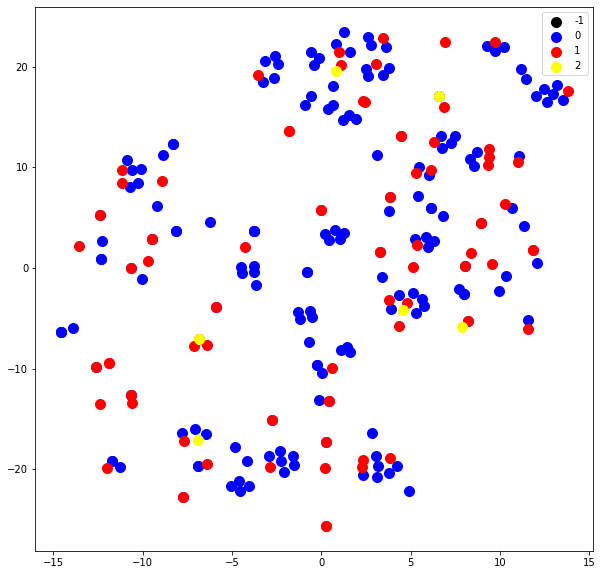

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
cdict = {-1: 'black', 0: 'blue', 1: 'red', 2: 'yellow', 3: 'green'}
for l in np.unique(label_list):
    idx = np.where(label_list == l)
    ax.scatter(feature_reduced[:,0][idx], feature_reduced[:,1][idx], c = cdict[l], label = l, s = 100)
ax.legend()
plt.show()